# Neural Network with Python
## 1. The Skeleton of A Neural Network Class
It should have at least __3 functions__:
* __initialization__ - to set the number of input, hidden, and output nodes.
* __train__ - refine the weights after being given a training set example to learn from.
* __query__ - give an answer from the output nodes after being given an input.

## 2. Initializing the Network
We need to set the number of input, hidden and output layer nodes. That defines the shape and size of the neural network.

Let them be set when a new neural network object is created by using parameters. That way we retain the choice to create new neural networks of different sizes with ease.

## 3. Weights - The Heart of the Network
The link weights are used to calculate the signal being fed forward, the error as it's propagated backwards, and it it the link weights themselves that are refined to improve the network.
We can create:
* A matrix for the weights for links between the input and hidden layers, __W_input_hidden__ of size hidden_nodes by input_nodes
* Another matrix for the links between the hidden and output layers, __W_hidden_output__ of size output_nodes by hidden_nodes  

The initial values of the link weights should be small and random to avoid saturation.

## 4. Querying the Network
The query() function takes the input to a neural network and returns the network’s output.  

We need to pass the input signals from the input layer of nodes, through the hidden layer and out of the final output layer.   
We also need to use the link weights to moderate the signals and then use the sigmoid activation function to squish the signal coming out of those nodes.  

Moderating input: __X_hidden = W_input_hidden · I__  

Applying sigmoid function: __O_hidden = sigmoid ( X_hidden )__  

## 5. Training the Network
There are two phases to training:
* The first part is working out the output for a given training example. That is no different to the query() function.
* The second part is taking this calculated output, comparing it with the desired output, and using the difference to guide the updating of the network weights.

Let's get started!

In [ ]:
import numpy as np

# import sigmoid function expit()
from scipy.special import expit

In [ ]:
# create a 3 layers neural network class
class NeuralNetwork:

  # initialize the neural network:
  def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
    # set number of nodes in each input, hidden, output layer
    self.inodes = inputnodes
    self.hnodes = hiddennodes
    self.onodes = outputnodes

    # set learning rate
    self.lr = learningrate

    # create an function called activation_function which takes x and returns expit(x)
    self.activation_function = lambda x: expit(x)

    # set link weights matrices
    # numpy.random.rand generates random values between 0 and 1, minus 0.5 to make them between -0.5 and 0.5
    self.wih = np.random.rand(self.hnodes, self.inodes) - 0.5
    self.who = np.random.rand(self.onodes, self.hnodes) - 0.5


  # define the training function of the neural network:
  def train(self, inputs_list, targets_list):
    # convert inputs and targets list to 2d array
    inputs = np.array(inputs_list, ndmin=2).T
    targets = np.array(targets_list, ndmin=2).T

    # calculate inputs into hidden layer
    hidden_inputs = np.dot(self.wih, inputs)
    # calculate the outputs emerging form hidden layer
    hidden_outputs = self.activation_function(hidden_inputs)

    # calculate inputs into final output layer
    final_inputs = np.dot(self.who, hidden_outputs)
    # calculate the outputs emerging from final output layer
    final_outputs = self.activation_function(final_inputs)

    # calculate the error
    output_errors = targets - final_outputs
    # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
    hidden_errors = np.dot(self.who.T, output_errors)

    # update the weights for the links between the hidden and output layers
    self.who += self.lr * np.dot(output_errors * final_outputs * (1 - final_outputs), hidden_outputs.T)
    # update the weights for the links between the input and hidden layers
    self.wih += self.lr * np.dot(hidden_errors * hidden_outputs * (1 - hidden_outputs), inputs.T)


  # define the query function of the neural network:
  def query(self, inputs_list):
    # convert inputs list to 2d array
    inputs = np.array(inputs_list, ndmin=2).T

    # calculate inputs into hidden layer
    hidden_inputs = np.dot(self.wih, inputs)
    # calculate the outputs emerging form hidden layer
    hidden_outputs = self.activation_function(hidden_inputs)

    # calculate inputs into final output layer
    final_inputs = np.dot(self.who, hidden_outputs)
    # calculate the outputs emerging from final output layer
    final_outputs = self.activation_function(final_inputs)

    return final_outputs

# The MNIST Dataset of Handwritten Numbers

Now we try to use the neural network we just created to recognize handwritten numbers.

* A t​raining​ set: http://www.pjreddie.com/media/files/mnist_train.csv
* A t​est ​set: http://www.pjreddie.com/media/files/mnist_test.csv

The content of the data set:  
* The first value is the l​abel, ​that is, the actual digit that the handwriting is supposed to represent, such as a "7" or a "9". 
* The subsequent values, are the pixel values of the handwritten digit. The size of the pixel array is 28 by 28, so there are 784 values after the label.  
* The color values range between 0 and 255.

Let's do some explorations of the data sets.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# load training data
mnist_train = pd.read_csv('/content/mnist_train.csv', header = None)
mnist_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see from the dataframe that the first value in a row is the handwritten number, the following 784 values are pixel values of the number.

In [ ]:
len(mnist_train)

60000

We have 60,000 training examples in total.

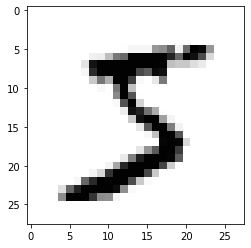

In [ ]:
# use matplotlib to visualize pixel arrays

# convert the pd.Series of the first number's pixel values into a np.array and reshape it into a 28 by 28 matrix
first_num_array = np.array(mnist_train.iloc[0,1:]).reshape(28,28)
# plot the array of pixel values
plt.imshow(first_num_array, cmap='Greys')

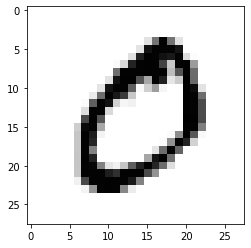

In [ ]:
# visualize the second number
second_num_array = np.array(mnist_train.iloc[1,1:]).reshape(28,28)
plt.imshow(second_num_array, cmap='Greys')

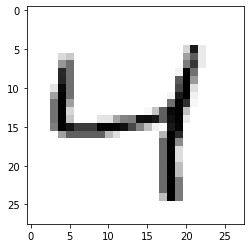

In [ ]:
# visualize the third number
third_num_array = np.array(mnist_train.iloc[2,1:]).reshape(28,28)
plt.imshow(third_num_array, cmap='Greys')

## Preparing the MNIST Training Data
Large inputs will make the gradient of the sigmoid function very small, which consequently limits the learning ability of a neural network.
So the first thing we need to do is to rescale the input color values from the large range 0 to 255 to the range 0.01 ­- 1.0 to avoid saturation.  

- We choose 0.01 as the lower end to avoid zero inputs which might kill weight updates.

In [ ]:
mnist_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# extract the pixel values data as inputs
mnist_train_values = mnist_train.iloc[:,1:]
mnist_train_values.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# divide raw inputs by 255 to make them [0, 1], and multiply by 0.99 to make them [0.0, 0.99], then add 0.01 to make them [0.01, 1.00]
scaled_input = (mnist_train_values / 255) * 0.99 + 0.01
scaled_input.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
2,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
3,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
4,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01


## What Should the Output Be?
We’re asking the neural network to classify the image and assign the correct label. That label is one of 10 numbers, from 0 to 9. That means should be able to have an output layer of 10 nodes, one for each of the possible answers, or labels.  
* If the answer was “0” the first output layer node would fire and the rest should be silent. If the answer was “9” the last output layer node would fire and the rest would be silent.  

* If the label for a training example is “5”, we need to create a target array for the output node where all the elements are small except the one corresponding to the label “5”. That could look like the following [0, 0, 0, 0, 0, 1, 0, 0, 0, 0].  But the outputs should match the range of values that the activation function can push out, which is (0.0, 1.0), so we need to rescale the output number. The target for the label “5” should be [0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01].

In [ ]:
# extract the labels as desired outputs
train_labels = mnist_train.iloc[:,0]
print(train_labels)

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: 0, Length: 60000, dtype: int64


In [ ]:
# create the target output values (all 0.01, except the desire label which is 0.99)
targets_test = np.zeros(10) + 0.01
targets_test[train_labels.iloc[0]] = 0.99  
targets_test  # the first label in the data set is 5

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01])

## Setting the Neural Netwrok
We set 784 input nodes because that's the number of input features.

For hidden nodes, we don't choose numbers larger than 784 because the idea is that the neural network should find features or patterns in the input which can be expressed in a shorter form than the input itself. So by choosing a values smaller than the number of inputs, we force the network to try to summarise the key features.  

However, if we choose too few hidden layer nodes, then we restrict the ability of the network to find sufficient features or patterns. Given the output layer needs 10 labels, hence 10 output nodes, the choice of an intermediate 100 for the hidden layer seems to make sense.  

There isn’t a perfect method for choosing how many hidden nodes there should be for a problem. Indeed there isn’t a perfect method for choosing the number of hidden layers either. The best approaches, for now, are to experiment until you find a good configuration for the problem you’re trying to solve.

In [ ]:
# set the numbers of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# set learning rate
learning_rate = 0.3

# create an instance of neural network
mnist_n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

## Training the Neural Network


In [ ]:
# train the network
for i in range(len(mnist_train)):
  inputs = scaled_input.iloc[i,:]
  targets = np.zeros(output_nodes) + 0.01
  targets[train_labels.iloc[i]] = 0.99
  mnist_n.train(inputs, targets)

## Preparing the testing data


In [ ]:
# load the testing data
mnist_test = pd.read_csv('/content/mnist_test.csv', header = None)
mnist_test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(mnist_test)

10000

We have 10,000 testing cases in total.

In [ ]:
# prepare the testing data
mnist_test_values = mnist_test.iloc[:,1:]
mnist_test_values.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# rescale the testing data
scaled_input_test = (mnist_test_values / 255) * 0.99 + 0.01
scaled_input_test.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
2,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
3,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
4,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01


## The Performance of Neural Network

In [ ]:
# extract the labels of testing data 
test_labels = mnist_test.iloc[:,0]
test_labels.head()

0    7
1    2
2    1
3    0
4    4
Name: 0, dtype: int64

In [ ]:
# examine the first 10 answers
for i in range(10):
  inputs_test = scaled_input_test.iloc[i,:]
  outputs_test = mnist_n.query(inputs_test)
  # np.agrmax return the indices of the maximum values along an axis
  label_outputs = np.argmax(outputs_test)
  label_correct = test_labels.iloc[i]
  print(label_outputs, label_correct)

7 7
2 2
1 1
0 0
4 4
1 1
4 4
9 9
6 5
9 9


In [ ]:
# examine the performance using the whole test set
correct_num = 0
for i in range(len(mnist_test)):
  inputs_test = scaled_input_test.iloc[i,:]
  outputs_test = mnist_n.query(inputs_test)
  label_outputs = np.argmax(outputs_test)
  label_correct = test_labels.iloc[i]
  if label_outputs == label_correct:
    correct_num += 1

# calculate the accuracy
correct_pct = correct_num / len(mnist_test)
print(correct_pct)

0.9426


The network achieves a 94.26% accuracy by now.

# Improving the Performance of Neural Network

## 1. Tweaking the Learning Rate
The first improvement we can try is to adjust the learning rate.

In [ ]:
# set different learning rates
learning_rates = np.arange(0.1, 1, 0.1)
learning_rates

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
# calculate the accuracies of different learning rates
correct_pct_list_rate = []

for rate in learning_rates:
  network = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, rate)
  # train the network
  for i in range(len(mnist_train)):
    inputs = scaled_input.iloc[i,:]
    targets = np.zeros(output_nodes) + 0.01
    targets[train_labels.iloc[i]] = 0.99
    network.train(inputs, targets)

  # test the network
  correct_num = 0
  for i in range(len(mnist_test)):
    inputs_test = scaled_input_test.iloc[i,:]
    outputs_test = network.query(inputs_test)
    label_outputs = np.argmax(outputs_test)
    label_correct = test_labels.iloc[i]
    if label_outputs == label_correct:
      correct_num += 1

  # calculate the accuracy
  correct_pct = correct_num / len(mnist_test)
  correct_pct_list_rate.append(correct_pct)

print(correct_pct_list_rate)

[0.9483, 0.9451, 0.9415, 0.9383, 0.9269, 0.9001, 0.8967, 0.8578, 0.8362]


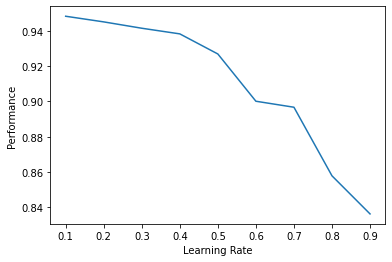

In [ ]:
# plot the performance with regard to different learning rates
plt.plot(learning_rates, correct_pct_list_rate)
plt.xlabel('Learning Rate')
plt.ylabel('Performance')
plt.show()

From the graph, we can see that the performance is maximized when using a learning rate of 0.1, where the accuracy is 94.83%. So let's stick to this learning rate in the next steps.

## 2. Doing Multiple Runs
The next improvement we can do is to repeat the training several times against the data set. Some people call each run through an e​poch.​   

The reason it is worth doing is that we’re helping those weights do that gradient descent by providing more chances to creep down those slopes.

But we need to be careful of overfitting. Too much training is actually bad because the network overfits to the training data, and then performs badly against new data that it hasn’t seen before.


In [ ]:
# set different epochs
epochs = [i for i in range(1,16,1)]
epochs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [ ]:
# calculate the accuracies of different epochs
correct_pct_list_epoch = []

for epoch in epochs:
  network = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, 0.1)
  # train the network multiple times
  for e in range(epoch):
    for i in range(len(mnist_train)):
      inputs = scaled_input.iloc[i,:]
      targets = np.zeros(output_nodes) + 0.01
      targets[train_labels.iloc[i]] = 0.99
      network.train(inputs, targets)

  # test the network
  correct_num = 0
  for i in range(len(mnist_test)):
    inputs_test = scaled_input_test.iloc[i,:]
    outputs_test = network.query(inputs_test)
    label_outputs = np.argmax(outputs_test)
    label_correct = test_labels.iloc[i]
    if label_outputs == label_correct:
      correct_num += 1

  # calculate the accuracy
  correct_pct = correct_num / len(mnist_test)
  correct_pct_list_epoch.append(correct_pct)

print(correct_pct_list_epoch)

[0.9461, 0.9576, 0.9608, 0.9633, 0.9629, 0.9652, 0.9657, 0.9654, 0.963, 0.9647, 0.9649, 0.9646, 0.9634, 0.9622, 0.9648]


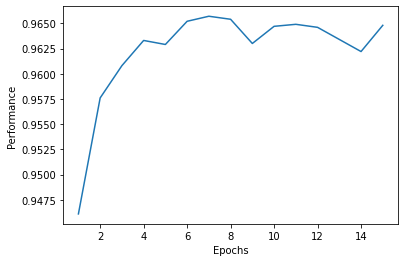

In [ ]:
# plot the performance with regard to different epochs
plt.plot(epochs, correct_pct_list_epoch)
plt.xlabel('Epochs')
plt.ylabel('Performance')
plt.show()

From the graph, we can see that the performance is maximized when we train the network 7 times, which increases the accuracy to 96.57%. So let's use 7 epochs in the following improvement.

## 3. Change Network Shape
The hidden layer is the layer which is where the learning happens. The input nodes simply bring in the input signals, and the output nodes simply push out the network’s answer. It’s the hidden layers which have to learn to turn the input into the answer. Actually, it’s the link weights before and after the hidden nodes that do the learning.


Let’s try changing the number of hidden layer nodes.

In [ ]:
# set different numbers of hidden nodes
hidden_nodes_num = [i for i in range(100,800,100)]
hidden_nodes_num

[100, 200, 300, 400, 500, 600, 700]

In [ ]:
# calculate the accuracies of different numbers of hidden nodes
correct_pct_list_nodes = []

for num in hidden_nodes_num:
  network = NeuralNetwork(input_nodes, num, output_nodes, 0.1)
  # train the network 7 times
  for e in range(7):
    for i in range(len(mnist_train)):
      inputs = scaled_input.iloc[i,:]
      targets = np.zeros(output_nodes) + 0.01
      targets[train_labels.iloc[i]] = 0.99
      network.train(inputs, targets)

  # test the network
  correct_num = 0
  for i in range(len(mnist_test)):
    inputs_test = scaled_input_test.iloc[i,:]
    outputs_test = network.query(inputs_test)
    label_outputs = np.argmax(outputs_test)
    label_correct = test_labels.iloc[i]
    if label_outputs == label_correct:
      correct_num += 1

  # calculate the accuracy
  correct_pct = correct_num / len(mnist_test)
  correct_pct_list_nodes.append(correct_pct)

print(correct_pct_list_nodes)

[0.9659, 0.973, 0.9738, 0.9739, 0.9744, 0.9743, 0.9748]


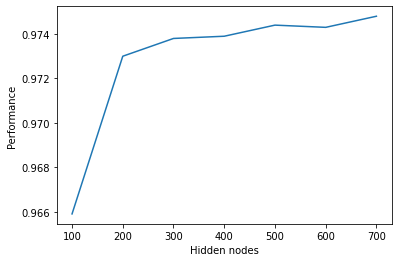

In [ ]:
# plot the performance with regard to different numbers of hidden nodes
plt.plot(hidden_nodes_num, correct_pct_list_nodes)
plt.xlabel('Hidden nodes')
plt.ylabel('Performance')
plt.show()

We can see from the graph that the performance increases significantly from 100 hidden nodes to 200 hidden nodes, and reaches the highest with 700 hidden nodes, with an accuracy rate of 97.48%. 

### __3.22% improvement!__
After experimenting with different parameters, we successfully increase the accuracy from 94.26% to 97.48%. Due to the limitation of computational resources, I haven't been unable to perform GridSearch to find the best combination of parameters. However, a 3.22% improvement is already satisfying and illustrates the worth of hyperparameter tuning well.